In [22]:
#Librerias usadas en el desarrollo del programa
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import nc_time_axis
import cftime
import requests
import os

In [2]:
#URL con la información de dropbox con el dataset de sst
url_sst = "https://www.dropbox.com/scl/fi/gubpg3vx07d3h1zn5ptxn/sst.nc?rlkey=wyho417yy04t946ot13ec6cjh&st=2ib8wwzi&dl=1"

# Descargar el archivo temporalmente
response = requests.get(url_sst)
with open('sst.nc', 'wb') as f:
    f.write(response.content)

# Abrir el archivo descargado en dataframe
df_sst = xr.open_dataset('sst.nc')
df_sst #Tos es igual a la temperatura en la supeficie del oceano - Datos en Kelvin - Datos Mensuales

<xarray.Dataset>
Dimensions:    (time: 720, bnds: 2, lat: 90, lon: 144)
Coordinates:
  * time       (time) object 1951-01-16 12:00:00 ... 2010-12-16 12:00:00
  * lat        (lat) float64 -89.0 -87.0 -85.0 -83.0 ... 83.0 85.0 87.0 89.0
  * lon        (lon) float64 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object ...
    lat_bnds   (lat, bnds) float64 ...
    lon_bnds   (lon, bnds) float64 ...
    tos        (time, lat, lon) float32 ...
Attributes: (12/27)
    institution:            NASA/GISS (Goddard Institute for Space Studies) N...
    institute_id:           NASA-GISS
    experiment_id:          amip
    source:                 GISS-E2-R-E135OCNf9aF40 Atmosphere: GISS-E2
    model_id:               GISS-E2-R
    forcing:                GHG, LU, Sl, Vl, BC, OC, SA, Oz (also includes or...
    ...                     ...
    table_id:               Table Omon (31 January 2011) 0e69fc5d1417dfcfbf0a...
    title:                  GISS-E2-R model output prepared for CMIP5 AMIP
    parent_experiment:      N/A
    modeling_realm:         ocean
    realization:            1
    cmor_version:           2.5.7

In [3]:
#URL con la información de dropbox con el dataset de slp
url_slp = "https://www.dropbox.com/scl/fi/xjyo67lv366earknxuxjx/slp.mon.mean.nc?rlkey=42y7e5lq0fpah3vlt2piy4hja&st=evl10nst&dl=1"
# Descargar el archivo temporalmente
response = requests.get(url_slp)
with open('slp.nc', 'wb') as f:
    f.write(response.content)

# Abrir el archivo descargado en dataframe
df_slp = xr.open_dataset('slp.nc')
df_slp #Ver los datos del slp 



<xarray.Dataset>
Dimensions:  (lat: 73, lon: 144, time: 919)
Coordinates:
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2024-07-01
Data variables:
    slp      (time, lat, lon) float32 ...
Attributes:
    description:    Data is from NMC initialized reanalysis\n(4x/day).  These...
    platform:       Model
    Conventions:    COARDS
    NCO:            20121012
    history:        Thu May  4 18:12:35 2000: ncrcat -d time,0,622 /Datasets/...
    title:          monthly mean slp from the NCEP Reanalysis
    dataset_title:  NCEP-NCAR Reanalysis 1
    References:     http://www.psl.noaa.gov/data/gridded/data.ncep.reanalysis...

In [4]:
#URL con la información de dropbox con el dataset de olr
url_olr = "https://www.dropbox.com/scl/fi/3f520wpuuvgb00567vd17/olr.mon.mean.1975.nc?rlkey=gv45ar9na6slnd504uis32eta&st=855gy7kw&dl=1"
# Descargar el archivo temporalmente
response = requests.get(url_olr)
with open('olr.nc', 'wb') as f:
    f.write(response.content)

# Abrir el archivo descargado en dataframe
df_olr = xr.open_dataset('olr.nc')
df_olr #Ver los datos del olr 

<xarray.Dataset>
Dimensions:  (lat: 73, lon: 144, time: 576)
Coordinates:
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 1975-01-01 1975-02-01 ... 2022-12-01
Data variables:
    olr      (time, lat, lon) float32 ...
Attributes:
    title:          Monthly means of OLR from interpolated OLR dataset
    description:    Data is interpolated in time and space from NOAA twice-da...
    platform:       Observation
    Conventions:    CF-1.2
    References:     https://www.psl.noaa.gov/data/gridded/data.interp_OLR.html
    references:     https://www.esrl.noaa.gov/psd/data/gridded/data.interp_OL...
    Citation:       Liebmann and Smith: June 2006: Description of a Complete ...
    dataset_title:  NOAA Interpolated Outgoing Longwave Radiation (OLR)
    source:         ftp.cpc.ncep.noaa.gov precip/noaa..
    date_modified:  12 Feb 2019
    history:        Tue Dec 12 11:00:30 2023: ncks -d time,7, olr.mon.mean.nc...
    NCO:            netCDF Operators version 4.8.1 (Homepage = http://nco.sf....

In [5]:
#URL con la información de dropbox con el dataset de U winds: Vientos (Vientos zonales)
url_u_winds = "https://www.dropbox.com/scl/fi/pb5wp86v7j4j64tc2247u/uwnd.10m.mon.mean.nc?rlkey=nwjwdy93thksxhvblm9m0ky2a&st=27rdj43x&dl=1"
# Descargar el archivo temporalmente
response = requests.get(url_u_winds)
with open('u_winds.nc', 'wb') as f:
    f.write(response.content)

# Abrir el archivo descargado en dataframe
df_u_winds = xr.open_dataset('u_winds.nc')
df_u_winds #Ver los datos del los vientos zonales a 10 metros del nivel del mar

<xarray.Dataset>
Dimensions:  (lat: 94, lon: 192, time: 919)
Coordinates:
  * lat      (lat) float32 88.54 86.65 84.75 82.85 ... -84.75 -86.65 -88.54
  * lon      (lon) float32 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2024-07-01
Data variables:
    uwnd     (time, lat, lon) float32 ...
Attributes:
    Conventions:    COARDS
    description:    Data is from NMC initialized reanalysis\n(4x/day).  It co...
    platform:       Model
    NCO:            20121013
    history:        renamevars Thu Feb  1 09:41:58 2001 from uwnd10m.mon.mean...
    title:          monthly mean uwnd.10m from the NCEP Reanalysis
    dataset_title:  NCEP-NCAR Reanalysis 1
    References:     http://www.psl.noaa.gov/data/gridded/data.ncep.reanalysis...

In [6]:
#URL con la información de dropbox con el dataset de U winds: Vientos (Vientos meridoniales)
url_v_winds = "https://www.dropbox.com/scl/fi/uhb8a307ashl2gpop197u/vwnd.10m.mon.mean.nc?rlkey=dlddkzii8okq2gkrab1fhyg0h&st=bm9kqff4&dl=1"
# Descargar el archivo temporalmente
response = requests.get(url_v_winds)
with open('v_winds.nc', 'wb') as f:
    f.write(response.content)

# Abrir el archivo descargado en dataframe
df_v_winds = xr.open_dataset('v_winds.nc')
df_v_winds #Ver los datos del los vientos meridoniales a 10 metros del nivel del mar

<xarray.Dataset>
Dimensions:  (lat: 94, lon: 192, time: 919)
Coordinates:
  * lat      (lat) float32 88.54 86.65 84.75 82.85 ... -84.75 -86.65 -88.54
  * lon      (lon) float32 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2024-07-01
Data variables:
    vwnd     (time, lat, lon) float32 ...
Attributes:
    Conventions:    COARDS
    description:    Data is from NMC initialized reanalysis\n(4x/day).  It co...
    platform:       Model
    NCO:            20121013
    history:        renamevars Thu Feb  1 09:47:30 2001 from vwnd10m.mon.mean...
    title:          monthly mean vwnd.10m from the NCEP Reanalysis
    dataset_title:  NCEP-NCAR Reanalysis 1
    References:     http://www.psl.noaa.gov/data/gridded/data.ncep.reanalysis...

Empezamos con el analisis de los datos que vamos a trabajar en para la predicción del ENSO en la region del Niño 3.4

Nos concentraremos en la región del Niño 3.4 y los datos iran desde el 20 de Enero de 1951 hasta 1 de Diciembre de 2010

C:\Users\orteg\AppData\Local\Temp\ipykernel_17208\1436766926.py:8: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  times_converted = tos_mean.indexes['time'].to_datetimeindex()


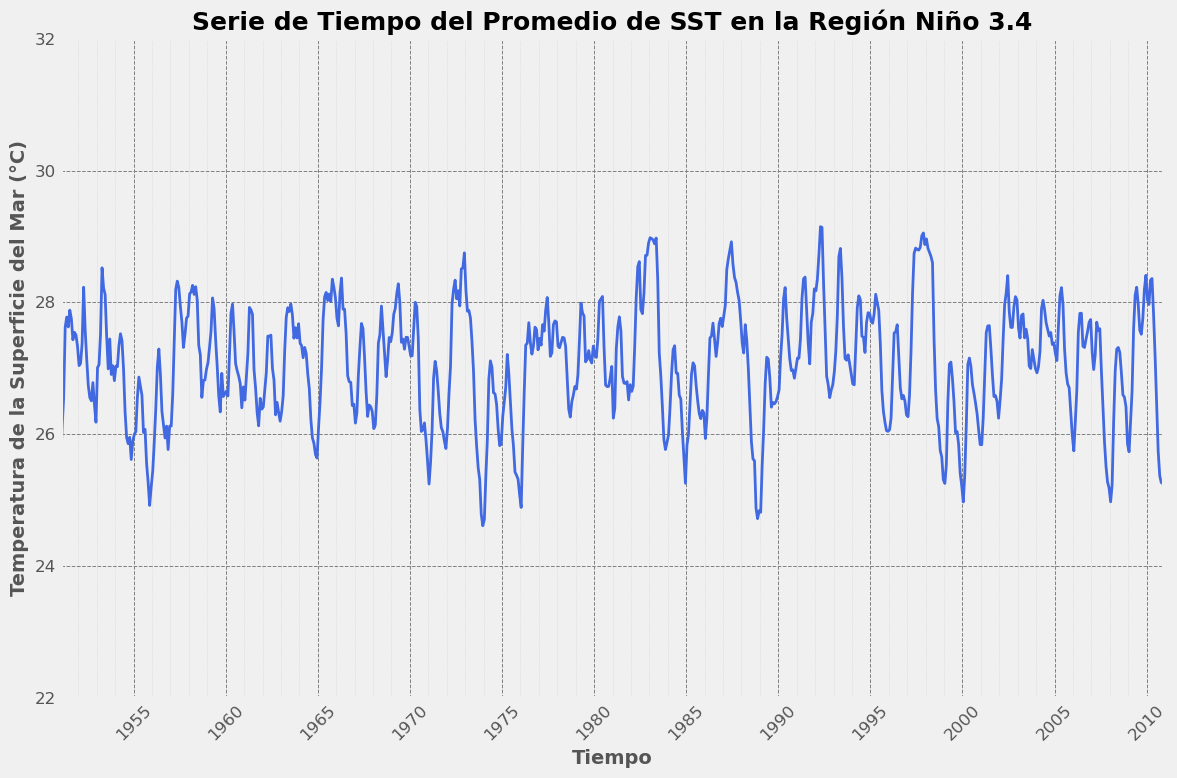

In [50]:
#Recortamos la grafica de sst a la región requerida por nosotros
df_sst_nino3_4 = df_sst.sel(lat=slice(-5, 5), lon=slice(190, 240)) #DataArray de la region nino 3.4
tos = df_sst_nino3_4['tos']- 273.15
# Calcular el promedio sobre las dimensiones de latitud y longitud
tos_mean = tos.mean(dim=['lat', 'lon'])

# Convertir las fechas a cftime.datetime si es necesario ------> IMPORTANTISIMO
times_converted = tos_mean.indexes['time'].to_datetimeindex()

# Graficar la serie de tiempo con un estilo alternativo
plt.style.use('fivethirtyeight')  # Cambiar a 'ggplot' o cualquier otro disponible

# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(12, 8))

# Graficar la serie de tiempo del promedio
ax.plot(times_converted, tos_mean, color='royalblue', linewidth=2)

# Personalizar el título y las etiquetas
ax.set_title('Serie de Tiempo del Promedio de SST en la Región Niño 3.4', fontsize=18, weight='bold')
ax.set_xlabel('Tiempo', fontsize=14, weight='bold')
ax.set_ylabel('Temperatura de la Superficie del Mar (°C)', fontsize=14, weight='bold')

# Asegurar que el eje X cubra el rango de fechas desde 1951 hasta 2010
ax.set_xlim(times_converted.min(), times_converted.max())

# Mejorar las divisiones del eje X (tiempo)
ax.xaxis.set_major_locator(mdates.YearLocator(5))  # Divisiones principales cada 5 años
ax.xaxis.set_minor_locator(mdates.YearLocator(1))  # Divisiones menores cada 1 año
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Formato de año para las etiquetas principales

# Rotar las etiquetas del eje X para mejor legibilidad
plt.xticks(rotation=45)

# Personalizar las líneas de la cuadrícula
ax.grid(True, which='major', linestyle='--', linewidth=0.7, color='grey')
ax.grid(True, which='minor', linestyle=':', linewidth=0.5, color='lightgrey')

# Ajustar el tamaño de la fuente para los ticks
ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis='both', which='minor', labelsize=10)

# Establecer el límite inferior del eje Y en 20°C
ax.set_ylim(22, 32)

# Mostrar el gráfico
plt.tight_layout()
plt.show()